# Las Series y DataFrames de Pandas

La librería Pandas proporciona estructuras de datos de alto nivel que permiten representar series y tablas de datos, así como herramientas diseñadas específicamente para un tratamiento de datos rápido y sencillo. Está construida sobre los fundamentos de NumPy, adaptando las operaciones sobre arrays a las nuevas estructuras definidas en Pandas. Resulta especialmente útil cuando hay que trabajar con datos heterogéneos representados de forma tabular. 

Empezó a desarrollarse en el año 2008 por Wes McKinney (McKinney, 2012) en un intento por conseguir una herramienta flexible y de alto rendimiento para el tratamiento de datos financieros. En el año 2012, Chang She comenzó a participar en el desarrollo de la librería. Actualmente Pandas forma parte de un proyecto en el que participan muchos desarrolladores. 

Pandas es actualmente una de las librerías de alto nivel de Python más utilizadas en las primeras etapas del proceso de análisis de datos, especialmente apropiada en aplicaciones estadísticas. 

En esta Sección introducimos las estructuras principales de Pandas, como son las Series y DataFrames, así como las operaciones básicas que se pueden realizar con dichas estructuras.

Toda la información oficial de la librería se encuentra accesible en el enlace http://pandas.pydata.org.


## Importar librerías

En esta Sección trabajaremos principalmente con las librerías Pandas, NumPy y la librería básica para visualización Matplotlib. Importamos las tres librerías con alias `pd`, `np` y `plt` respectivamente:

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

## Estructuras de Datos en Pandas

En Pandas disponemos de varias estructuras de datos y métodos que nos ayudarán a manipular dichas estructuras de forma sencilla y eficiente. Las dos estructuras de datos principales vienen representadas por las clases `Series`  y `DataFrame`, capaces de representar series de datos y datos en forma tabular respectivamente.  

### Series

Un objeto del tipo `Series` puede verse como un objeto de tipo array de una dimensión que contiene datos de un cierto tipo y tiene asociado un índice. Este índice es un array de etiquetas cuyo tamaño coincide con el tamaño del array de datos. 

A continuación creamos una variable `s` de tipo `Serie` mediante la función `pd.Series` y una lista de elementos:

In [6]:
s = pd.Series(  [10, 20, 30.9, 40, -10], 
               index = ['ES', 'FR', 'IT', 'IT', 'ES'],
               name = 'importación')
s

ES    10.0
FR    20.0
IT    30.9
IT    40.0
ES   -10.0
Name: importación, dtype: float64

In [7]:
s.name = 'Paises'
s

ES    10.0
FR    20.0
IT    30.9
IT    40.0
ES   -10.0
Name: Paises, dtype: float64

In [5]:
s.values

array([ 10. ,  20. ,  30.9,  40. , -10. ])

In [8]:
s.index

Index(['ES', 'FR', 'IT', 'IT', 'ES'], dtype='object')

In [9]:
s

ES    10.0
FR    20.0
IT    30.9
IT    40.0
ES   -10.0
Name: Paises, dtype: float64

Como podemos observar, la serie `s` contiene elementos de tipo `int64` (columna de la derecha). Los elementos de la serie están indexados mediante un array de enteros comenzando desde el 0 (columna de la izquierda). Entre las propiedades de las `Series` tenemos `index` y `values`, que representan el índice y los elementos de la serie:

In [8]:
s.index

Index(['ES', 'FR', 'IT', 'IT', 'ES'], dtype='object')

In [9]:
s.values

array([ 10. ,  20. ,  30.9,  40. , -10. ])

Una de las ventajas de trabajar con `Series`, es que es posible indexar cada elemento de la serie con un valor descriptivo o etiqueta. Por ejemplo, si nuestros datos representan la tasa de natalidad de distintas ciudades españolas, sería interesante usar el nombre de las ciudades cómo etiquetas del índice, en lugar de usar etiquetas de tipo `int`:

In [10]:
nat = pd.Series([10.7, 7.5, 7.1, 17.8, 7.9 ],  
               index=['Murcia','Cantabria', 'Galicia', 'Melilla','Canarias' ],
               name = 'Tasa de Natalidad')       

In [11]:
nat

Murcia       10.7
Cantabria     7.5
Galicia       7.1
Melilla      17.8
Canarias      7.9
Name: Tasa de Natalidad, dtype: float64

El argumento `name` de la función `pd.Series` permite asignar un nombre a la serie creada. Otra de las propiedades de las `Series` es `name`:

In [12]:
nat.name

'Tasa de Natalidad'

En este caso, tenemos dos procedimientos para acceder a los datos de una serie. El primero es mediante la etiqueta del índice y notación de corchetes, como en el caso de las listas o los arrays:

In [13]:
nat['Murcia']

10.7

El segundo es mediante la etiqueta del índice (siempre que sea un nombre válido en Python) como si fuera una propiedad de la serie:

In [14]:
nat.Murcia

10.7

Está claro que los datos los podríamos haber representado con un array en lugar de una serie, pero como se puede ver, las series proporcionan mayor claridad en cuanto a los datos que contienen, la forma de acceso, etc. Por ejemplo, es posible preguntar de forma natural si un determinado valor está en el índice:

In [15]:
'Cantabria' in nat.index

True

En cuanto a las operaciones con series, tenemos por ejemplo, las operaciones aritméticas (`+`, `-` , `*` , `/ `) :

In [16]:
nat * 100

Murcia       1070.0
Cantabria     750.0
Galicia       710.0
Melilla      1780.0
Canarias      790.0
Name: Tasa de Natalidad, dtype: float64

In [17]:
resultado = nat + 100
resultado

Murcia       110.7
Cantabria    107.5
Galicia      107.1
Melilla      117.8
Canarias     107.9
Name: Tasa de Natalidad, dtype: float64

In [18]:
np.sqrt(nat)

Murcia       3.271085
Cantabria    2.738613
Galicia      2.664583
Melilla      4.219005
Canarias     2.810694
Name: Tasa de Natalidad, dtype: float64

Otra de las operaciones que se aplican a los arrays de Numpy y que se extienden a las series de Pandas, es la selección de elementos usando filtros:

In [19]:
nat[nat < 10]

Cantabria    7.5
Galicia      7.1
Canarias     7.9
Name: Tasa de Natalidad, dtype: float64

La característica estrella de las series es el alineamiento de datos en base al valor de los índices en las operaciones entre dos series:

In [20]:
nach = pd.Series([2154, 8184, 10032, 780, 8177],  
               index=['Cantabria', 'Canarias', 
                      'Galicia', 'Melilla', 'Murcia'],
               name = 'Nacidos Hombres')    

In [21]:
nacm = pd.Series([7962, 2221,  730, 9395],  
               index=['Canarias', 'Cantabria', 'Melilla',  'Galicia'],
               name = 'Nacidas Mujeres')  

In [22]:
nach

Cantabria     2154
Canarias      8184
Galicia      10032
Melilla        780
Murcia        8177
Name: Nacidos Hombres, dtype: int64

In [23]:
nacm

Canarias     7962
Cantabria    2221
Melilla       730
Galicia      9395
Name: Nacidas Mujeres, dtype: int64

In [24]:
nach + nacm

Canarias     16146.0
Cantabria     4375.0
Galicia      19427.0
Melilla       1510.0
Murcia           NaN
dtype: float64

In [25]:
nach.add(nacm, fill_value = 0)

Canarias     16146.0
Cantabria     4375.0
Galicia      19427.0
Melilla       1510.0
Murcia        8177.0
dtype: float64

El resultado de la operación anterior contiene el valor __NaN__. Este valor se usa para representar un campo vacío o desconocido. Es el equivalente al valor NULL del lenguaje SQL. En este caso, la serie `nach` tiene valor `8177` para la etiqueta `Murcia`, pero la serie `nacm` no contiene dicha etiqueta en su índice, por lo que la suma de ambos produce como resultado `NaN`.

Aunque los valores `NaN` generan algunos problemas a la hora de realizar ciertos análisis, puede ser útil definir una serie a partir de un array que contenga uno o varios valores NaN.

In [26]:
nacm = pd.Series([7962, np.NaN,  730, np.NaN],  
               index=['Canarias', 'Cantabria', 'Melilla',  'Galicia'],
               name = 'Nacidas Mujeres')  


In [27]:
nacm

Canarias     7962.0
Cantabria       NaN
Melilla       730.0
Galicia         NaN
Name: Nacidas Mujeres, dtype: float64

Los métodos `isnull` y `notnull` de las `Series` permiten identificar aquellas etiquetas en el índice asociadas a un valor `NaN`. Como resultado se obtiene una nueva serie cuyos valores son de tipo `Bool`.

In [28]:
nacm.isnull()

Canarias     False
Cantabria     True
Melilla      False
Galicia       True
Name: Nacidas Mujeres, dtype: bool

In [29]:
nacm.notnull()

Canarias      True
Cantabria    False
Melilla       True
Galicia      False
Name: Nacidas Mujeres, dtype: bool

In [30]:
nacm.fillna(method = 'ffill', inplace = True)

In [31]:
nacm

Canarias     7962.0
Cantabria    7962.0
Melilla       730.0
Galicia       730.0
Name: Nacidas Mujeres, dtype: float64

El análisis descriptivo de los datos representados mediante una serie se puede realizar usando los métodos `mean` (media), `median` (mediana), `std`(desviación estándar), `min`(mínimo), `max`(máximo) y `quantile`(quantiles) o usando el método `describe` de las `Series`:

In [32]:
nach.mean(), nach.median(), nach.std()

(5865.4, 8177.0, 4114.478679006613)

In [3]:
nach.describe()

NameError: name 'nach' is not defined

Como complemento a la información proporcionada por el método `describe`, la librería Pandas junto con Matplotlib permiten la creación de los gráficos más comunes en estadística descriptiva. Para crear un diagrama de barras (`bar`) y un diagrama de tarta (`pie`) escribimos lo siguiente:

In [34]:
nach

Cantabria     2154
Canarias      8184
Galicia      10032
Melilla        780
Murcia        8177
Name: Nacidos Hombres, dtype: int64

Podemos hacer una   visualización básica:

In [2]:
figura, ax1 = plt.subplots(1, figsize = (5,2))
nach.plot(ax = ax1, kind = 'barh', title = 'Diagrama de barras - Hombres');

NameError: name 'plt' is not defined

La variable `figura` representa el lienzo sobre el que pintaremos uno o varios gráficos. En el ejemplo anterior, pintamos un único gráfico llamado `ax1`.

Si queremos dibujar dos gráficos en el mismo lienzo, en la misma `figura`, indicaremos que nuestro lienzo se compone de una fila `nrows = 1`  y dos columnas `cols= 2`. Usaremos los parámetros `nrows` y  `ncols` en la función `plt.subplots`.

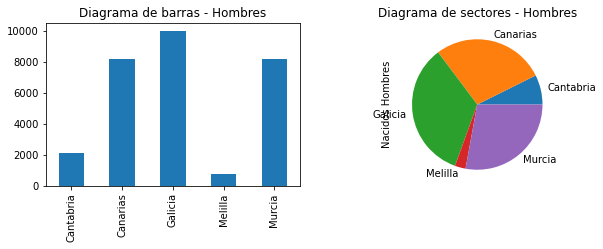

In [79]:
figura, (ax1, ax2) = plt.subplots(nrows = 1, ncols= 2,  figsize = (10,3))
nach.plot(ax=ax1, kind = 'bar', title = 'Diagrama de barras - Hombres');
nach.plot(ax=ax2, kind = 'pie', title = 'Diagrama de sectores - Hombres');

La gestión de valores duplicados se realiza mediante los métodos `unique` y `value_count` de las `Series`. El método `unique` devuelve un array con los valores de la serie sin duplicados. A continuación creamos una serie con valores duplicados:

In [80]:
pos = pd.Series(['Sur', 'Norte',  'Sur', 'Norte', 'Norte'],  
               index=['Cádiz', 'Cantabria', 'Melilla',  'Galicia', 'Asturias'])

In [81]:
pos

Cádiz          Sur
Cantabria    Norte
Melilla        Sur
Galicia      Norte
Asturias     Norte
dtype: object

In [82]:
pos.unique()

array(['Sur', 'Norte'], dtype=object)

Por otro lado, el método `value_counts` devuelve la frecuencia de cada uno de los valores de una serie:

In [83]:
pos.value_counts()

Norte    3
Sur      2
dtype: int64

### Los datos de tipo DataFrame

Los  `DataFrame`  de Pandas están diseñados para manejar datos representados en forma de tabla, donde tanto las filas como las columnas están indexadas. Los datos de tipo `DataFrame` pueden verse como una colección ordenada de columnas, cada una de las cuales viene representada por un objeto de tipo `Series`, con su nombre y su índice. Cada columna tiene asociado un tipo de datos y todas las columnas comparten el mísmo índice. En este caso, usaremos el término *dataframe* para referirnos a los datos de tipo `DataFrame`. 

Hay varias formas de crear  datos de tipo `DataFrame`. 

* Podemos usar la función `pd.DataFrame` si los datos se encuentran representados mediante una lista, un diccionario (de listas o de arrays), una `Serie` o incluso otro `DataFrame`. 

* Si los datos en encuentran en un fichero, Pandas proporciona las funciones `pd.read_csv`, `pd.read_excel`  para la creación de `DataFrame`.

En el siguiente ejemplo usamos la función  `pd.DataFrame` para crear un dataframe a partir de un diccionario:

In [84]:
d = { 'Ciudades' : ['Melilla', 'Canarias', 'Galicia', 'Cantabria', 'Murcia'],
      'Nacidos H': [780, 8184, 10032, 2154, 8177] 
    }


tabla = pd.DataFrame( data = d )
tabla

,Ciudades,Nacidos H
0,Melilla,780
1,Canarias,8184
2,Galicia,10032
3,Cantabria,2154
4,Murcia,8177


In [86]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ciudades   5 non-null      object
 1   Nacidos H  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [87]:
tabla.mean()

Nacidos H    5865.4
dtype: float64

In [88]:
tabla.describe()

,Nacidos H
count,5.000000
mean,5865.400000
std,4114.478679
min,780.000000
25%,2154.000000
50%,8177.000000
75%,8184.000000
max,10032.000000


In [89]:
tabla.Ciudades

0      Melilla
1     Canarias
2      Galicia
3    Cantabria
4       Murcia
Name: Ciudades, dtype: object

In [90]:
tabla['Nacidos H']

0      780
1     8184
2    10032
3     2154
4     8177
Name: Nacidos H, dtype: int64

In [91]:
tabla.columns

Index(['Ciudades', 'Nacidos H'], dtype='object')

Las claves del diccionario forman el índice de las columnas. El valor de cada una de las claves del diccinario ha de ser una lista o un array de igual longuitud. Al igual que las `Series`, los atributos `index` y `values` representan el índice y los datos del dataframe respectivamente: 

In [92]:
tabla.index

RangeIndex(start=0, stop=5, step=1)

In [93]:
tabla.values

array([['Melilla', 780],
       ['Canarias', 8184],
       ['Galicia', 10032],
       ['Cantabria', 2154],
       ['Murcia', 8177]], dtype=object)

A diferencia de las series, que tienen un único índice, los dataframes tienen dos  índices. El primero es un índice común para todas las columnas y está asociado a cada una de las filas. El segundo índice contiene un array de etiquetas o nombres de columnas. La propiedad `columns` representa el índice de las columnas:

In [94]:
tabla.columns

Index(['Ciudades', 'Nacidos H'], dtype='object')

Para crear un  `DataFrame ` a partir de una serie, escribimos lo siguiente:

In [95]:
nat = pd.Series([10.7, 7.5, 7.1, 17.8, 7.9 ],  
               index=['Murcia','Cantabria', 'Galicia', 'Melilla','Canarias' ],
               name = 'Valor')  

In [96]:
nat

Murcia       10.7
Cantabria     7.5
Galicia       7.1
Melilla      17.8
Canarias      7.9
Name: Valor, dtype: float64

In [97]:
tabla2 = pd.DataFrame(nat)

In [98]:
tabla2

,Valor
Murcia,10.7
Cantabria,7.5
Galicia,7.1
Melilla,17.8
Canarias,7.9


In [99]:
tabla2.index

Index(['Murcia', 'Cantabria', 'Galicia', 'Melilla', 'Canarias'], dtype='object')

El índice del `DataFrame` creado coincide con el índice de la serie `nat` y el nombre de la columna es el nombre de la `Serie`.

La función `pd.DataFrame` admite más argumentos, como por ejemplo los argumentos `index` y `columns` para crear el índice de las filas y columnas del `DataFrame` respectivamente. En el siguiente ejemplo creamos un `DataFrame` con datos acerca de la producción de mantequilla en miles de toneladas de ciertos paises en distintos años (fuente: http://ec.europa.eu/eurostat/web/agriculture/data/main-tables):

In [41]:
tabla3 = pd.DataFrame( data = [ ('Estonia', 8.4, 7.7, 6.7, 'A'), 
                                ('Ireland',193.5, 227.76, 221.05, 'B'),
                                ('Greece',1.4,1.6,1.5, 'A'),
                                ('Spain',50.52,58.9,46.72, 'C'),
                                ('France',415.09,423.1,400.52, 'A') ],
                      
                      
                       columns =  ['Desc', '2004', '2005', '2006', 'Tipo'], 
                       index = [ 'EE', 'IE', 'EL', 'ES', 'FR'])
tabla3

,Desc,2004,2005,2006,Tipo
EE,Estonia,8.40,7.70,6.70,A
IE,Ireland,193.50,227.76,221.05,B
EL,Greece,1.40,1.60,1.50,A
ES,Spain,50.52,58.90,46.72,C
FR,France,415.09,423.10,400.52,A


El método `info` de los datos de tipo  `DataFrame` muestra información acerca del objeto `DataFrame` (el número de columnas, el número de filas, la cantidad de memoria usada), e información relativa a cada una de las columnas (el nombre de las columnas, su tipo y el número de valores distinto de `NaN`).

In [43]:
tabla3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, EE to FR
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Desc    5 non-null      object 
 1   2004    5 non-null      float64
 2   2005    5 non-null      float64
 3   2006    5 non-null      float64
 4   Tipo    5 non-null      object 
dtypes: float64(3), object(2)
memory usage: 240.0+ bytes


El método `describe` muestra los primeros estadísticos, lo que permite hacer un análisis de los datos en cada una de las columnas numéricas. 

In [105]:
tabla3.describe()       

,2004,2005,2006
count,5.000000,5.000000,5.000000
mean,133.782000,143.812000,135.298000
std,175.270242,180.976401,173.191749
min,1.400000,1.600000,1.500000
25%,8.400000,7.700000,6.700000
50%,50.520000,58.900000,46.720000
75%,193.500000,227.760000,221.050000
max,415.090000,423.100000,400.520000


Los datos mostrados son la media (`mean`),  la mediana (`median`), la desviación estándar(`std`), el minimo (`min`), el máximo (`max`) y los quantiles (`quantile`). 

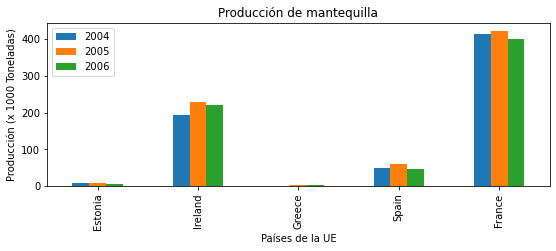

In [109]:
figura, ax1 = plt.subplots(1, figsize = (9,3))

tabla3.plot(ax=ax1, kind = 'bar', title = 'Producción de mantequilla')

ax1.set_xlabel('Países de la UE')
ax1.set_ylabel('Producción (x 1000 Toneladas)')
ax1.set_xticklabels(tabla3.Desc);

Al igual que las `Series`, los `DataFrame` también disponen de métodos estadísticos (`mean`, `std`, `min`, etc). Estos métodos devuelven un valor solo para aquellas columnas numéricas del objeto  `DataFrame`.

In [110]:
tabla3

,Desc,2004,2005,2006,Tipo
EE,Estonia,8.40,7.70,6.70,A
IE,Ireland,193.50,227.76,221.05,B
EL,Greece,1.40,1.60,1.50,A
ES,Spain,50.52,58.90,46.72,C
FR,France,415.09,423.10,400.52,A


In [112]:
tabla3.mean(axis = 1)

EE      7.600000
IE    214.103333
EL      1.500000
ES     52.046667
FR    412.903333
dtype: float64

In [113]:
tabla3.std()

2004    175.270242
2005    180.976401
2006    173.191749
dtype: float64

Todas las operaciones estadísticas admiten el argumento `axis`, el cual permite operar bien sobre los datos de las columnas o bien sobre los datos en las filas. 

In [114]:
tabla3.sum(axis = 1)

EE      22.80
IE     642.31
EL       4.50
ES     156.14
FR    1238.71
dtype: float64

Una operación muy interesante cuando tratamos con datos representados mediante dataframes, es la de trasponer, es decir, cambiar filas por columnas. Para trasponer un dataframe es necesario utilizar el atributo `T`.

In [115]:
tabla3.T

,EE,IE,EL,ES,FR
Desc,Estonia,Ireland,Greece,Spain,France
2004,8.4,193.5,1.4,50.52,415.09
2005,7.7,227.76,1.6,58.9,423.1
2006,6.7,221.05,1.5,46.72,400.52
Tipo,A,B,A,C,A


## Referencias

* [Big Data. Análisis de datos con Python. Sarasa Cabezuelo, Antonio; García Ruiz, Yolanda Aditorial Garceta. ISBN: 978-84-1622-883-6](http://www.garceta.es/libro.php?ISBN=978-84-1622-883-6)
* [Python Data Analysis Library](http://pandas.pydata.org/)
* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)
